# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
from pandas import Series
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import requests, zipfile, StringIO

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [6]:
'''zip_file_url = "http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip"
#zip_file_url = "lahman-csv_2014-02-14.zip"
def DownloadFile(url):
    local_filename = url.split('/')[-1]
    r = requests.get(url)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
DownloadFile(zip_file_url)'''

'zip_file_url = "http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip"\n#zip_file_url = "lahman-csv_2014-02-14.zip"\ndef DownloadFile(url):\n    local_filename = url.split(\'/\')[-1]\n    r = requests.get(url)\n    with open(local_filename, \'wb\') as f:\n        for chunk in r.iter_content(chunk_size=1024): \n            if chunk: # filter out keep-alive new chunks\n                f.write(chunk)\nDownloadFile(zip_file_url)'

In [3]:
z = zipfile.ZipFile("lahman-csv_2014-02-14.zip")
print 
z.extractall(path='./csv1/')

In [2]:
salary = pd.read_csv('./csv1/Salaries.csv')
print salary.head()
team = pd.read_csv('./csv1/Teams.csv')
team.head()

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [7]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
   'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [8]:
print salary.groupby(['teamID', 'yearID']).sum().head()
pdts = salary.groupby(['teamID', 'yearID'],as_index=False).sum()
print pdts.head()
print 
#pdts = ts.reset_index()
#print pdts.head()
#print help(ts.reset_index)

                 salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167
  teamID  yearID    salary
0    ANA    1997  31135472
1    ANA    1998  41281000
2    ANA    1999  55388166
3    ANA    2000  51464167
4    ANA    2001  47535167



#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [9]:
df1 = pd.DataFrame( { 
    "Name" : ["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"] , 
    "City" : ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"] } )
print df1.groupby( [ "Name", "City"] ).size()
print DataFrame({'count' : df1.groupby( [ "Name", "City"] ).size()})
print df1.groupby( [ "Name", "City"] ).size().reset_index()
DataFrame({'count' : df1.groupby( [ "Name", "City"] ).size()}).reset_index()

Name     City    
Alice    Seattle     1
Bob      Seattle     2
Mallory  Portland    2
         Seattle     1
dtype: int64
                  count
Name    City           
Alice   Seattle       1
Bob     Seattle       2
Mallory Portland      2
        Seattle       1
      Name      City  0
0    Alice   Seattle  1
1      Bob   Seattle  2
2  Mallory  Portland  2
3  Mallory   Seattle  1


,Name,City,count
0,Alice,Seattle,1
1,Bob,Seattle,2
2,Mallory,Portland,2
3,Mallory,Seattle,1


In [10]:
showcol = ['teamID', 'yearID','salary','W']
swin = pd.merge(pdts, team, how='inner', on=['teamID', 'yearID'])[showcol]
swin.head()

,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [7]:
#swin = swin.fillna('N')
#swin['win'] = 0
#tn = lambda s: s.count('Y')
#swin.win = swin.DivWin.apply(tn) + swin.WCWin.apply(tn) +swin.LgWin.apply(tn) + swin.WSWin.apply(tn)
#swin.win = swin.awin.apply(lambda s: s.count('Y'))
#print swin.head()

In [8]:
'''
radius = np.array([2,4,8,16]) * 5
for i in range(swin.index[-1] + 1):
    if(swin.iloc[i].teamID == 'OAK'):
        plt.scatter(swin.iloc[i].yearID,swin.iloc[i].salary,
                    s=radius[swin.iloc[i].win],c='b')
        plt.annotate(swin.iloc[i].win, (swin.iloc[i].yearID,swin.iloc[i].salary))       
plt.show()
'''

"\nradius = np.array([2,4,8,16]) * 5\nfor i in range(swin.index[-1] + 1):\n    if(swin.iloc[i].teamID == 'OAK'):\n        plt.scatter(swin.iloc[i].yearID,swin.iloc[i].salary,\n                    s=radius[swin.iloc[i].win],c='b')\n        plt.annotate(swin.iloc[i].win, (swin.iloc[i].yearID,swin.iloc[i].salary))       \nplt.show()\n"

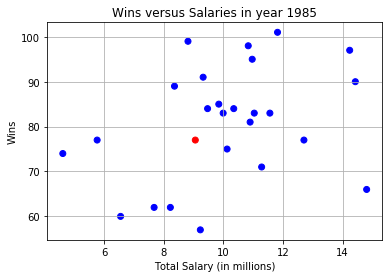

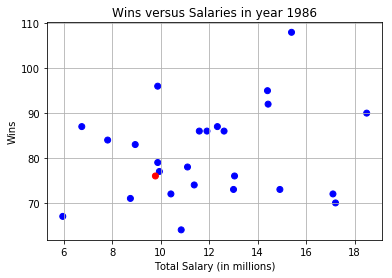

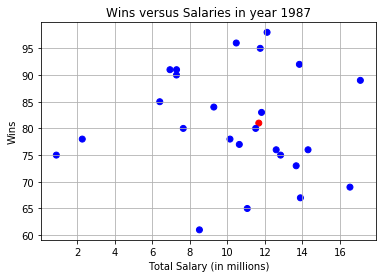

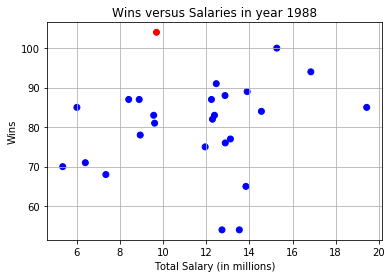

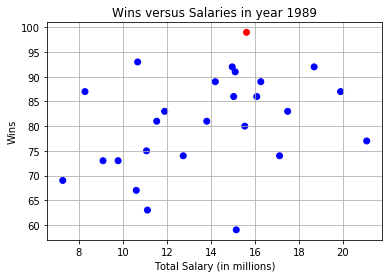

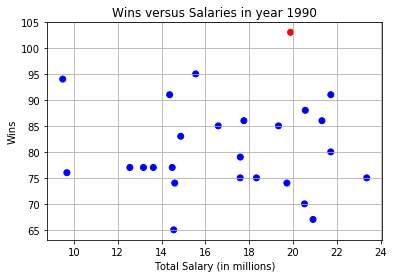

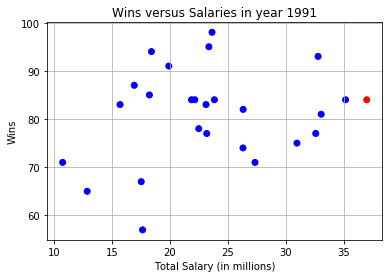

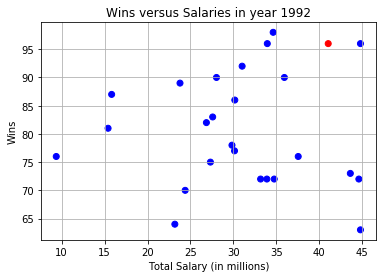

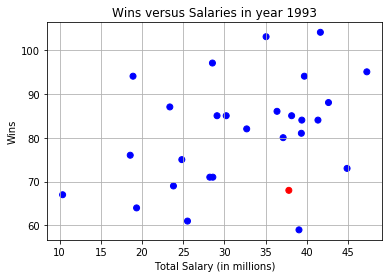

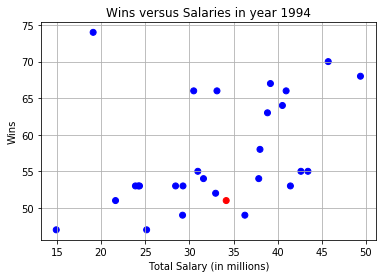

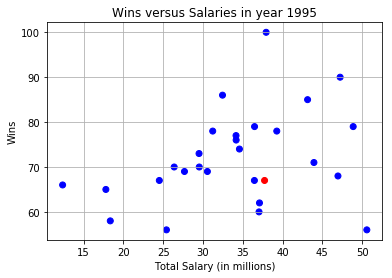

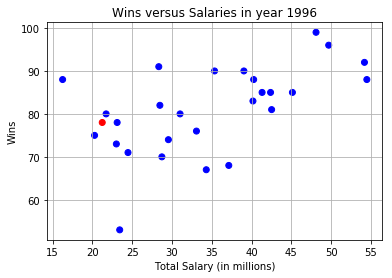

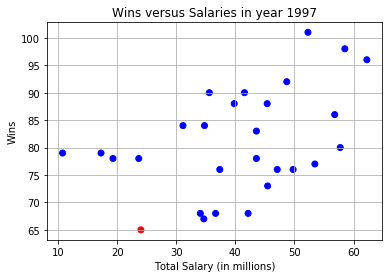

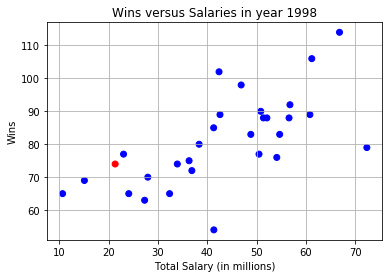

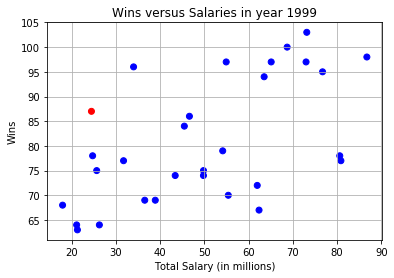

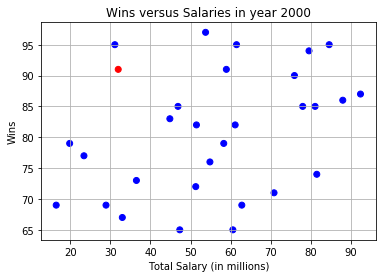

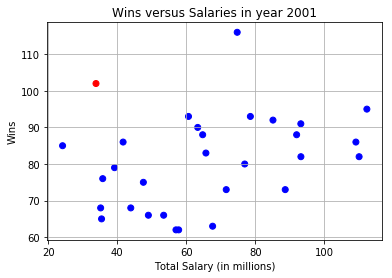

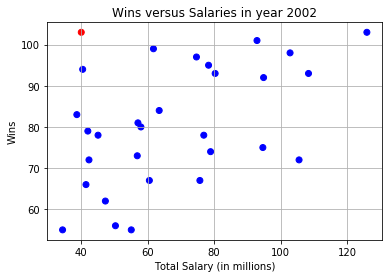

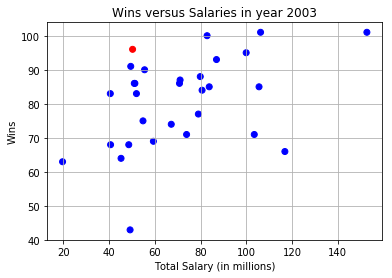

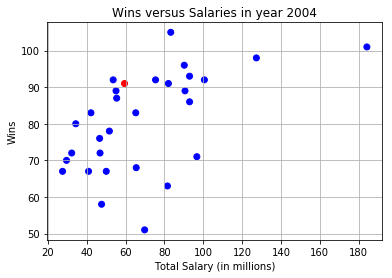

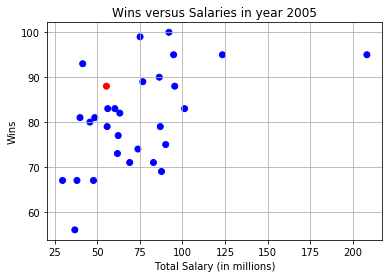

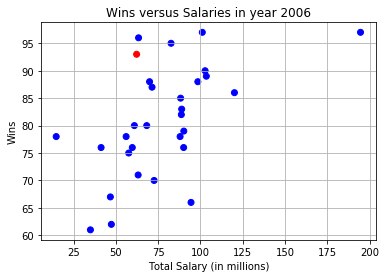

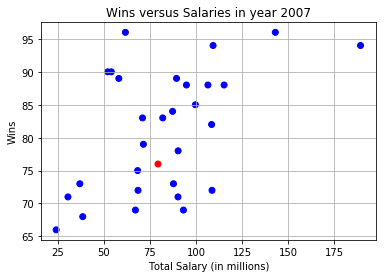

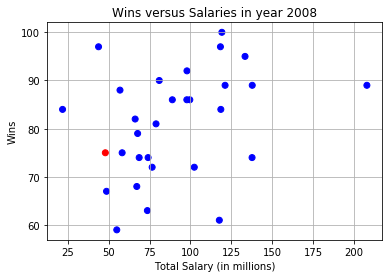

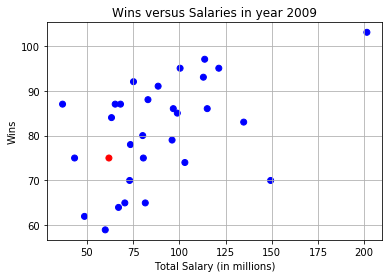

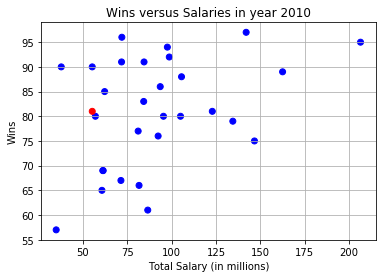

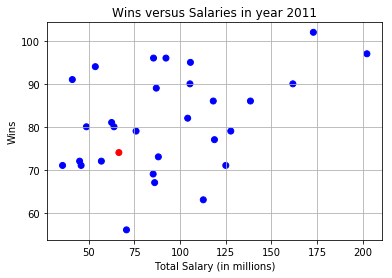

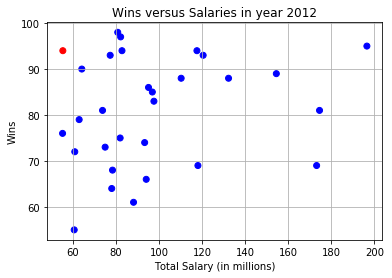

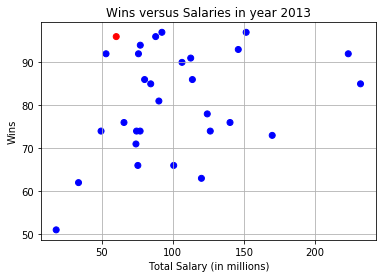

In [13]:
teamName = 'OAK'
years = np.arange(1985, 2014)
for i in years:
    df = swin[swin['yearID'] == i]
    #print df.iloc[2]['teamID']
    df0 = df[df['teamID'] == 'OAK']
    if(df0.empty == True):continue
    plt.title('Wins versus Salaries in year ' + str(i))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    #plt.xlim(0, 160)
    #plt.ylim(30, 120)
    plt.grid()
    plt.scatter(df['salary'] / 1e6,df['W'],
                c=map(lambda x: 'r' if x=='OAK' else 'b',df.teamID))
    plt.show()
#In which years can you detect a competitive advantage from the Oakland baseball team
#of using data science?
#first thinking, what is competitive advantage?

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [14]:
dft = pd.DataFrame()
dft[0] = pd.Series(index=['a','b','c','d'])
dft[1] = pd.Series([1,2], index=['a','b'])
dft[2] = pd.Series([1,3], index=['a','c'])
dft[3] = pd.Series([3,1], index=['c','a'])
dft[3] = pd.Series([4,3], index=['d','c'])
print dft

    0    1    2    3
a NaN  1.0  1.0  NaN
b NaN  2.0  NaN  NaN
c NaN  NaN  3.0  3.0
d NaN  NaN  NaN  4.0


In [15]:
items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items))
squared

[1, 4, 9, 16, 25]

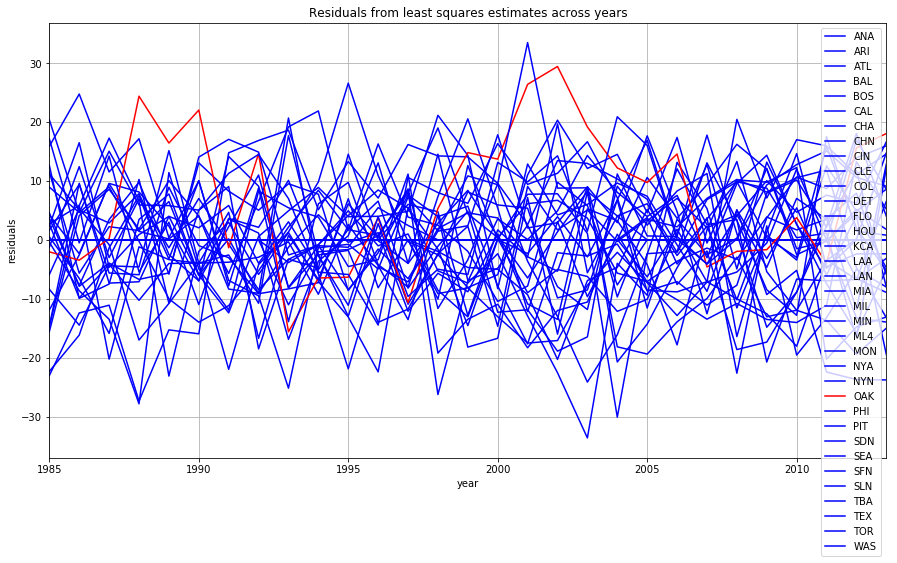

In [16]:
years = np.arange(1985, 2014)
#years = np.arange(1988, 1991)
#years = np.arange(1999, 2005)
#years = np.arange(1992, 1994)
lswin = swin[(swin.yearID < years[-1]) & (swin.yearID >= years[0])]
teamslist = lswin.drop_duplicates(subset=['teamID']).teamID.values
resid = pd.DataFrame()
resid[0] = pd.Series(index=teamslist)
teamName = 'OAK'
for i in years:
    df = swin[swin.yearID == i]
    xs = df.salary.values / 1e6
    x = np.vstack([xs, np.ones(len(xs))]).T
    y = df.W.values
    tname = df.teamID.values
    k, b = np.linalg.lstsq(x, y)[0]
    ry = y - (k * xs + b)
    #print len(ry)
    #print tname
    resid[i] = pd.Series(ry,index=tname)
resid = resid.fillna(0)
del resid[0]
resid = resid.T
resid.index = resid.index.format()
resid.plot(figsize = (15, 8), color=map(lambda x: 'r' if x=='OAK' else 'b',teamslist))
plt.title('Residuals from least squares estimates across years')
plt.xlabel('year')
plt.ylabel('residuals')
plt.grid()
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [2]:
'''url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s = StringIO.StringIO(requests.get(url).content)
countries = pd.read_csv(s)
countries.head()'''

'url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"\ns = StringIO.StringIO(requests.get(url).content)\ncountries = pd.read_csv(s)\ncountries.head()'

In [3]:
countries = pd.read_csv('./csv1/countries.csv')
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [79]:
income = pd.read_excel('csv1/indicator gapminder gdp_per_capita_ppp.xlsx', sheetname = "Data")
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [5]:
col = ['a','b','c']
data1 = DataFrame([[1,2,3],[10,11,12],[20,21,22]],columns=col)
print data1
data2 = data1.set_index('a')
print data2
data2.index.name = None
data2

    a   b   c
0   1   2   3
1  10  11  12
2  20  21  22
     b   c
a         
1    2   3
10  11  12
20  21  22


,b,c
1,2,3
10,11,12
20,21,22


In [6]:
tincome = income.set_index('GDP per capita')
tincome.columns = map(lambda x: int(x), tincome.columns)
tincome.index.name = None
tincome = tincome.T
tincome.head()

,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [7]:
nincome = income
nincome.index=income[income.columns[0]] # Make the countries as the index
nincome = nincome.drop(nincome.columns[0], axis = 1) 
nincome.columns = map(lambda x: int(x), nincome.columns) # Convert years from floats to ints
nincome = nincome.transpose()
nincome.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

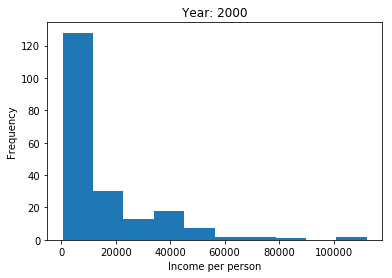

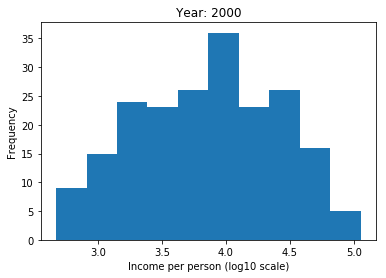

In [8]:
year = 2000
tincome.loc[2000].plot(kind='hist')
plt.title('Year: %i' % year)
plt.xlabel('Income per person')
plt.ylabel('Frequency')
plt.show()

np.log10(tincome.loc[2000]).plot(kind='hist')
plt.title('Year: %i' % year)
plt.xlabel('Income per person (log10 scale)')
plt.ylabel('Frequency')
plt.show()

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [9]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
def mergeByYear(year):
    data = pd.DataFrame(income[year].values, columns = ['Income'])
    data['Country'] = income['GDP per capita'].values
    re = pd.merge(data,countries, how="inner", on=['Country'])
    re.Income = np.round(re.Income, 2)
    return re

mergeByYear(2010).head()

,Income,Country,Region
0,1637.0,Afghanistan,ASIA
1,9374.0,Albania,EUROPE
2,12494.0,Algeria,AFRICA
3,38982.0,Andorra,EUROPE
4,7047.0,Angola,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

/home/csc/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


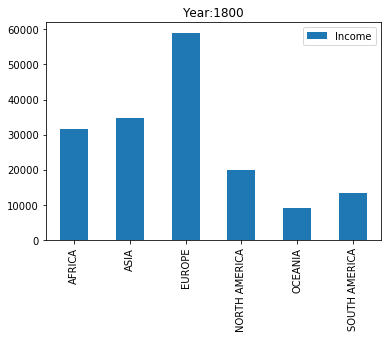

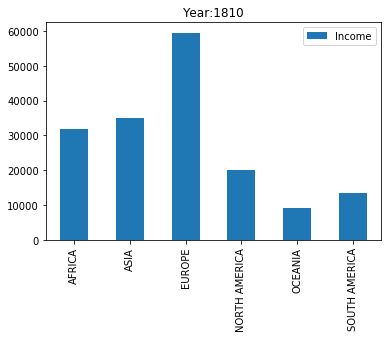

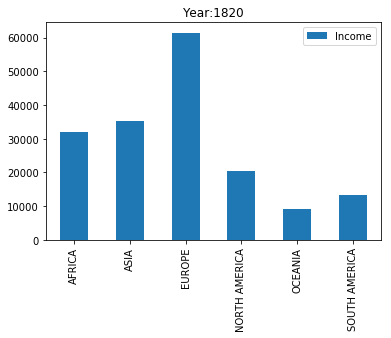

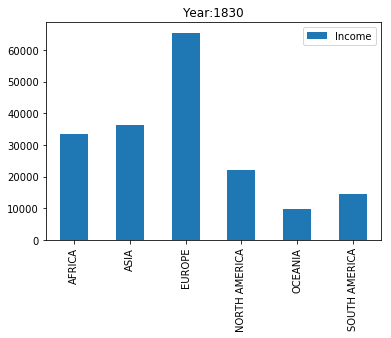

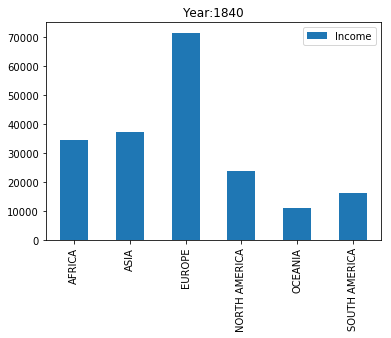

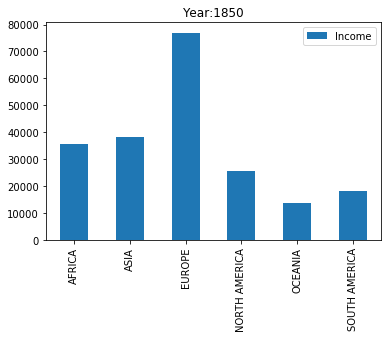

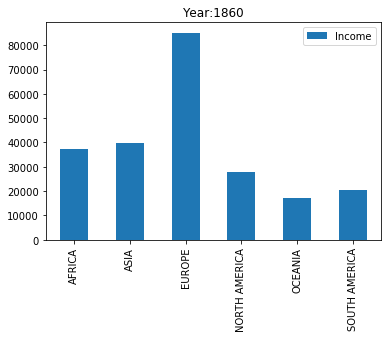

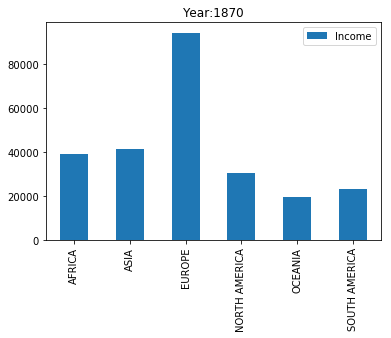

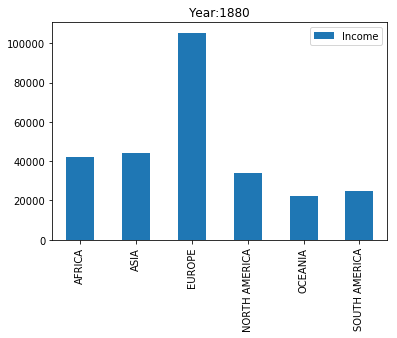

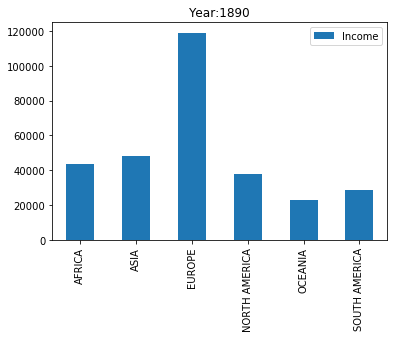

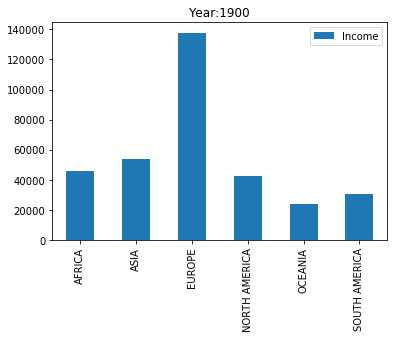

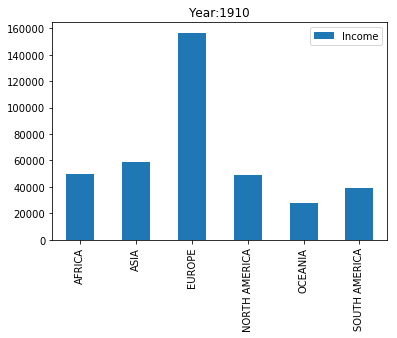

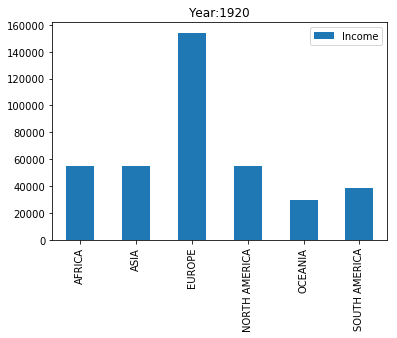

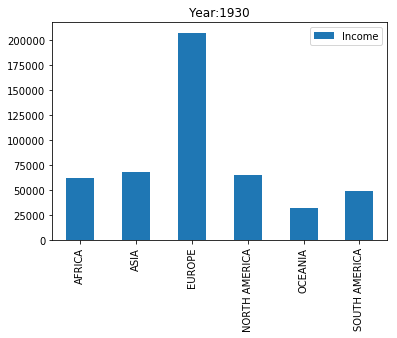

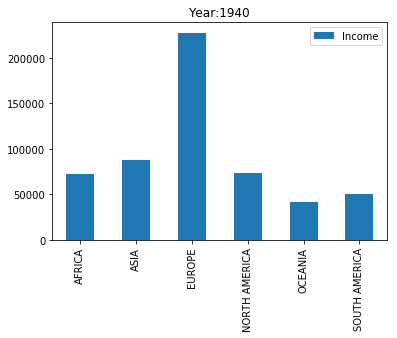

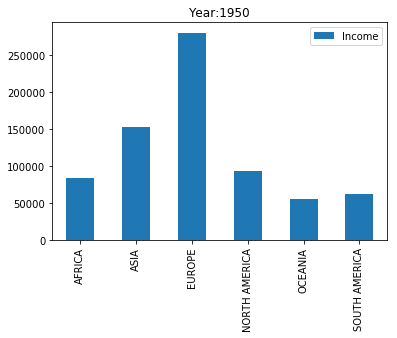

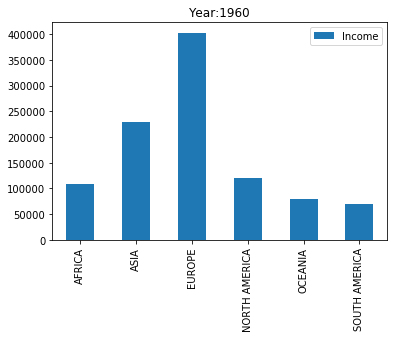

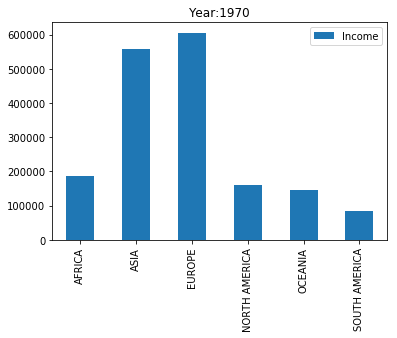

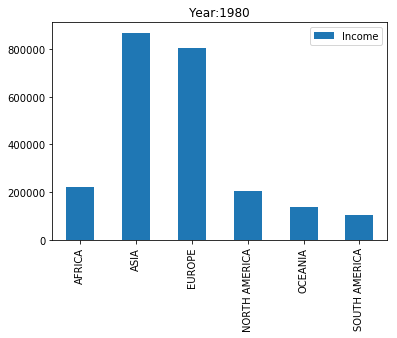

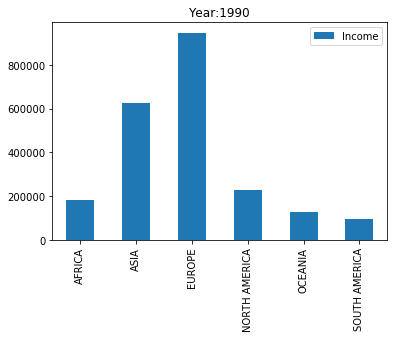

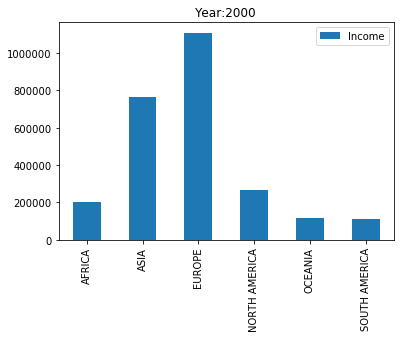

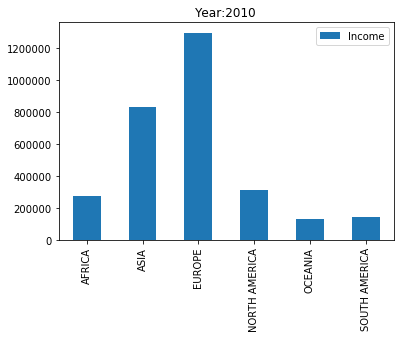

In [10]:
years = np.arange(1800, 2014,10)
for y in years:
    icr = mergeByYear(y)
    rc = icr.groupby(['Region'],as_index=False).sum()
    rc = rc.set_index('Region')
    rc.index.name = None
    #print rc
    #np.log(rc).hist(bins=30)
    #rc.hist(bins=30)
    rc.plot(kind='bar')
    plt.title("Year:" + str(y))
    #print rc

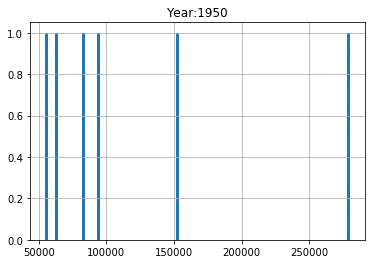

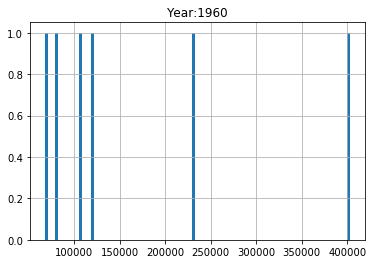

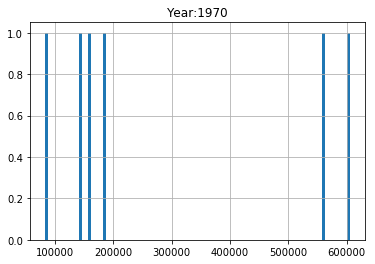

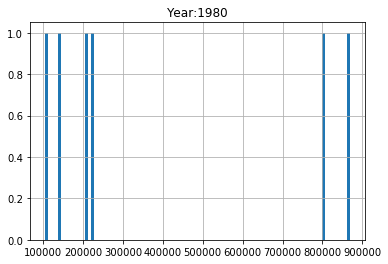

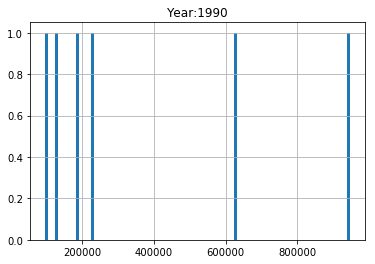

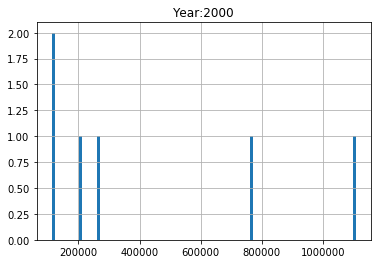

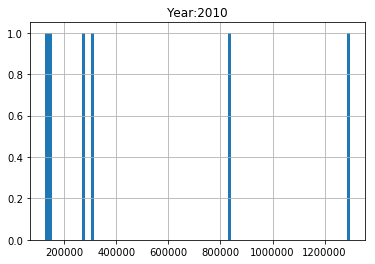

In [11]:
years = np.arange(1950, 2014,10)
for y in years:
    icr = mergeByYear(y)
    rc = icr.groupby(['Region'],as_index=False).sum()
    rc = rc.set_index('Region')
    rc.index.name = None
    rc.hist(bins=100)
    plt.title("Year:" + str(y))

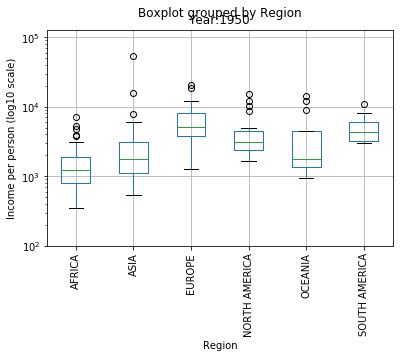

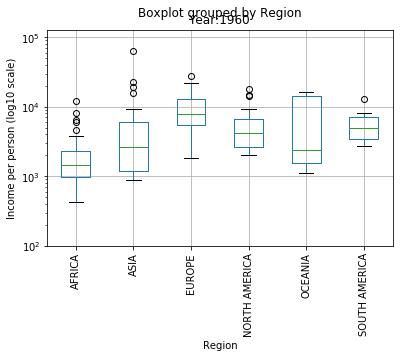

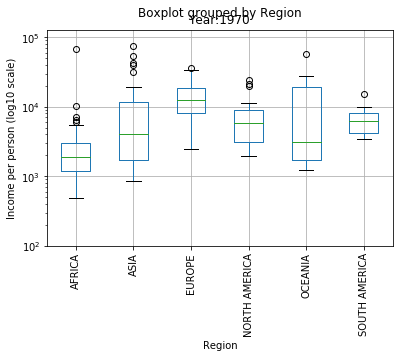

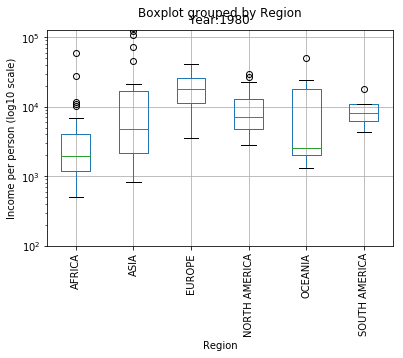

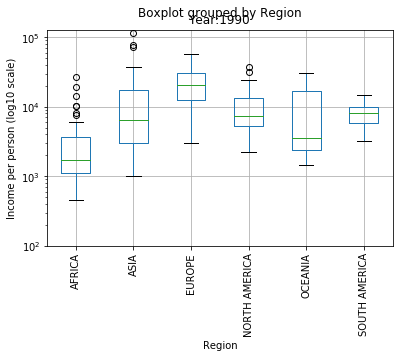

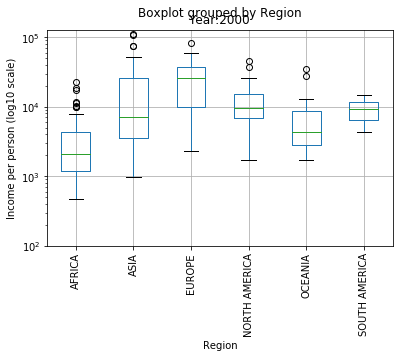

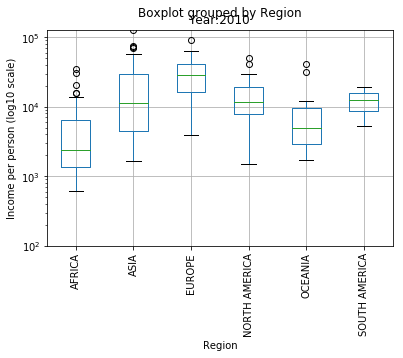

In [12]:
years = np.arange(1950, 2014,10)
for y in years:
    rc = mergeByYear(y)
    rc.boxplot('Income', by = 'Region', rot = 90)
    plt.title("Year:" + str(y))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [13]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
from pandas import Series
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import requests, zipfile, StringIO

In [14]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
import numpy as np
import scipy.stats 


6.97381686809
['a=2', 'a=3', 'a=4', 'a=5']


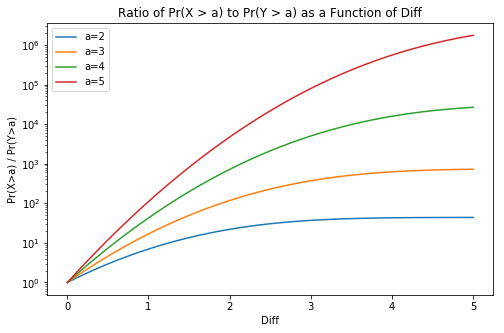

In [15]:
'''
wrong this is only simulations, we need statistics results
def ratioNormals(diff = 1, a = 2):
    x = np.random.normal(diff,1,1000000) 
    y = np.random.normal(0,1,1000000)
    return (sum(x > a) * 1.0 / len(x)) / (sum(y > a) * 1.0 / len(y))
'''
def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1) 
    #Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).
    return X.sf(a) / Y.sf(a)
print ratioNormals(1,2)

diffs = np.linspace(0, 5, 50)
a_values = range(2,6)

plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)
    
print ["a={}".format(a) for a in a_values]
plt.legend(["a={}".format(a) for a in a_values], loc=0);
plt.xlabel('Diff');
plt.ylabel('Pr(X>a) / Pr(Y>a)');
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff');
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [16]:
merge2012 = mergeByYear(2012)
ASA = merge2012[(merge2012.Region == 'ASIA') | (merge2012.Region == 'SOUTH AMERICA')]
ASA.Income = map(lambda x: float(x), ASA.Income)
asia = ASA[ASA.Region == 'ASIA']
south = ASA[ASA.Region == 'SOUTH AMERICA']
print asia.Income.mean(), south.Income.mean()


merged = mergeByYear(2012).groupby('Region', as_index=False).mean()
merged = merged.loc[(merged.Region == "ASIA") | (merged.Region == "SOUTH AMERICA")]
merged.Income = np.round(merged.Income, 2)
merged

23500.4324324 13015.75


/home/csc/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Region,Income
1,ASIA,23500.43
5,SOUTH AMERICA,13015.75


       Income               Country         Region
0      1893.0           Afghanistan           ASIA
6     17101.0             Argentina  SOUTH AMERICA
12    40732.0               Bahrain           ASIA
13     2725.0            Bangladesh           ASIA
19     7138.0                Bhutan           ASIA
20     5650.0               Bolivia  SOUTH AMERICA
23    15234.0                Brazil  SOUTH AMERICA
24    71664.0                Brunei           ASIA
27     2790.0              Cambodia           ASIA
33    21050.0                 Chile  SOUTH AMERICA
34    11017.0                 China           ASIA
35    11636.0              Colombia  SOUTH AMERICA
46    10233.0               Ecuador  SOUTH AMERICA
66     6054.0                Guyana  SOUTH AMERICA
71     4967.0                 India           ASIA
72     9327.0             Indonesia           ASIA
73    16068.0                  Iran           ASIA
74    14545.0                  Iraq           ASIA
76    30518.0                Is

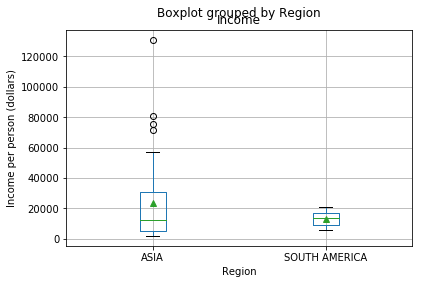

In [54]:
df = mergeByYear(2012)
df = df.loc[(df.Region == "ASIA") | (df.Region == "SOUTH AMERICA")]
df.boxplot('Income', by = 'Region', rot = 0,showmeans=True)
plt.ylabel('Income per person (dollars)')

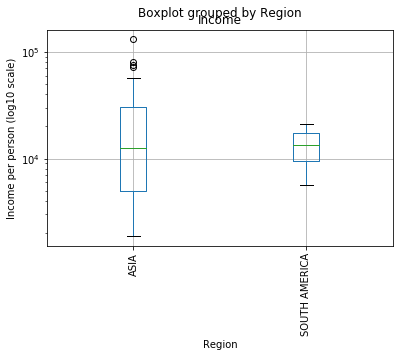

In [53]:
df = mergeByYear(2012)
df = df.loc[(df.Region == "ASIA") | (df.Region == "SOUTH AMERICA")]
df.boxplot('Income', by = 'Region', rot = 90)
plt.ylabel('Income per person (log10 scale)')
plt.yscale('log')

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [58]:
mregion = mergeByYear(2012)
cregion = mregion.groupby('Region', as_index=False).count()[['Region','Income']]
for i in range(len(cregion)):
    name = cregion.Region.iloc[i]
    p = len(mregion[(mregion.Region == name) & (mregion.Income > 10000)]) * 1.0 / cregion.Income.iloc[i]
    print cregion.Region.iloc[i], p

    
    
def ratioCountries(groupedData, a):
    prop = [len(group.Income[group.Income >= a]) / float(len(group.Income.dropna())) for key, group in groupedData]
    print groupedData.mean().index
    z = pd.DataFrame(groupedData.mean().index, columns = ['Region'])
    z['Mean'] = np.round(groupedData.mean().values,2)
    z['P(X > %g)' % a] = np.round(prop, 4)
    return z

df = mergeByYear(2012).groupby('Region')
df_ratio = ratioCountries(df, 1e4)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

AFRICA 0.2
ASIA 0.567567567568
EUROPE 0.860465116279
NORTH AMERICA 0.65
OCEANIA 0.307692307692
SOUTH AMERICA 0.75
Index([u'AFRICA', u'ASIA', u'EUROPE', u'NORTH AMERICA', u'OCEANIA',
       u'SOUTH AMERICA'],
      dtype='object', name=u'Region')


,Region,Mean,P(X > 10000)
1,ASIA,23500.43,0.5676
5,SOUTH AMERICA,13015.75,0.7500


#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [75]:
population = pd.read_excel('csv1/indicator_total population with projections.xlsx', sheetname = "Data")
population.columns.values[0] = 'Country'
population.head()

,Country,1086,1100,1290,1300,1348,1349,1351,1377,1413,...,2006,2007,2008,2009,2010,2011,2012,2013,2050,2100
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28420974.0,29145841.0,29839994.0,30577756.0,31411743.0,32358260.0,33397058.0,34499915.0,76249991.0,110878627.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3156607.0,3169665.0,3181397.0,3192723.0,3204284.0,3215988.0,3227373.0,3238316.0,2989747.0,1863359.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33391954.0,33906605.0,34428028.0,34950168.0,35468208.0,35980193.0,36485828.0,36983924.0,46521560.0,39983254.0


Consider we have $M$ regions.  Let $R_j$ be the number of countries in the $j^{th}$ region where $j = 1, \ldots, M$.  

If the income per person in a country $i$ is $I_i$, we previously calculated the average income per person over $R_j$ countries in the $j^{th}$ region using the following formula: 
    $$\bar{S}_j = \frac{1}{R_j}\sum_{i=1}^{R_j} I_i$$
Now, we want to consider the average income in a given region adjusting for each countries' population $N_i$. Therefore, we use the following formula to calculate an average income in a given region $R_j$ adjusting for the population in each country: 
     $$ \bar{S}_j = \frac{S_1 + S_2 + \ldots + S_{R_j}}{N_1 + N_2 + \ldots + N_{R_j} } = \frac{N_1 * I_1 + N_2 * I_2 + \ldots + N_{R_j} * I_{R_j}}{N_1 + N_2 + \ldots + N_{R_j} }$$
    
We start by creating a function similar to `mergeByYear()` from 2(c) which merges the income for each country in a given region, but also includes the population for each country. 

In [93]:
def mergeByYearWithPop(year):

    data = pd.DataFrame(income[year].values, columns = ['Income'])
    data['Country'] = income['GDP per capita'].values
    re = pd.merge(data,countries, how="inner", on=['Country'])
    
    # population DataFrame
    population_df = population[['Country',year]]

    # merge population DataFrame and joined DataFrame 
    re = pd.merge(re, population_df, how="inner", on=['Country'])
    re.columns = list(re.columns[:-1])+['TotalPopulation']
    re.Income = np.round(re.Income, 2)
    
    def f(df):
        totPop = df.sum()['TotalPopulation']
        #print totPop
        dfout = df
        dfout['AdjustedIncome'] = df.Income * df.TotalPopulation / float(totPop)
        dfout.AdjustedIncome = np.round(dfout.AdjustedIncome, 2)
        return dfout
        
    # Group by region
    returnDataFrame = re.groupby('Region').apply(f)
        
    return returnDataFrame

mergeByYearWithPop(2012).head()

,Income,Country,Region,TotalPopulation,AdjustedIncome
0,1893.0,Afghanistan,ASIA,33397058.0,15.66
1,9811.0,Albania,EUROPE,3227373.0,53.04
2,12779.0,Algeria,AFRICA,36485828.0,489.77
3,41926.0,Andorra,EUROPE,87518.0,6.15
4,7230.0,Angola,AFRICA,20162517.0,153.13


In [105]:
df = mergeByYearWithPop(2012).groupby('Region').sum()
df.Income = mergeByYear(2012).groupby('Region').mean().Income
df.Income = np.round(df.Income, 2)
print df
df = df.ix[['ASIA', 'SOUTH AMERICA']]
df

                 Income  TotalPopulation  AdjustedIncome
Region                                                  
AFRICA          5601.22     9.519823e+08         4913.02
ASIA           23500.43     4.036626e+09         9717.54
EUROPE         30492.72     5.970064e+08        31297.28
NORTH AMERICA  16036.65     5.371309e+08        37171.53
OCEANIA        10481.15     3.673307e+07        31288.98
SOUTH AMERICA  13015.75     4.005576e+08        14551.71


/home/csc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


,Income,TotalPopulation,AdjustedIncome
Region,,,
ASIA,23500.43,4.036626e+09,9717.54
SOUTH AMERICA,13015.75,4.005576e+08,14551.71


In 3(b) we computed the average income per person in each of the regions. The first column in the table above contains the averages from 3(b) (i.e. without adjusting for population). Column 2 contains the total population in the given region. The last column is the average income per person in each of the regions (adjusted for population).
To compare the boxplots from 3(b), here we plot the income per person for a given region (adjusted for population) on the log10 scale.

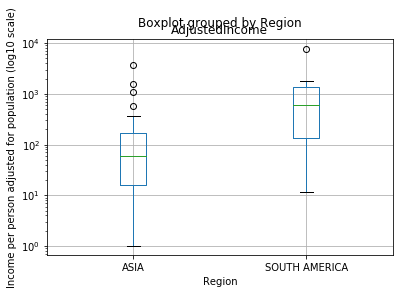

In [100]:
dfp = mergeByYearWithPop(2012)
dfp.AdjustedIncome = dfp['AdjustedIncome']
dfp = dfp[(dfp.Region == 'ASIA') | (dfp.Region == 'SOUTH AMERICA')]
dfp.boxplot('AdjustedIncome', by = 'Region', rot = 0)
plt.yscale('log')
plt.ylabel('Income per person adjusted for population (log10 scale)')

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
